In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_df = pd.read_csv(Path('diabetes-dataset.csv'))
pimaData_df = pd.read_csv(Path('diabetes_PIMA_INDIANS.csv'))
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
factors_df = diabetes_df.drop('Outcome', axis = 1)
#Ind_df = pd.get_dummies(Independent_df)
factors_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [4]:
diab_out_df = diabetes_df.Outcome
diab_out_df.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [5]:
# Split into train and test data:
X = factors_df
y = diab_out_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier2 = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7926666666666666
Logistic Regression Testing Data Score: 0.734


C:\Users\Walte\.conda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.974


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
classifier2.fit(X_train_scaled, y_train)
print(f"Logistic Regression Scaled Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Logistic Regression Scaled Training Data Score: 0.7913333333333333
Logistic Regression Scaled Testing Data Score: 0.736


In [10]:
clf2 = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf2.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 1.0
Random Forest Scaled Testing Score: 0.974


###  No Difference between scaled and unscaled data!

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


k: 1, Train/Test Score: 1.000/0.988
k: 3, Train/Test Score: 0.966/0.858
k: 5, Train/Test Score: 0.901/0.788
k: 7, Train/Test Score: 0.850/0.798
k: 9, Train/Test Score: 0.831/0.794
k: 11, Train/Test Score: 0.815/0.794
k: 13, Train/Test Score: 0.810/0.780
k: 15, Train/Test Score: 0.801/0.762
k: 17, Train/Test Score: 0.796/0.758
k: 19, Train/Test Score: 0.793/0.764
k: 21, Train/Test Score: 0.797/0.770
k: 23, Train/Test Score: 0.779/0.744
k: 25, Train/Test Score: 0.787/0.758
k: 27, Train/Test Score: 0.785/0.754
k: 29, Train/Test Score: 0.783/0.740
k: 31, Train/Test Score: 0.787/0.746
k: 33, Train/Test Score: 0.779/0.742
k: 35, Train/Test Score: 0.774/0.734
k: 37, Train/Test Score: 0.777/0.734
k: 39, Train/Test Score: 0.793/0.754
k: 41, Train/Test Score: 0.788/0.758
k: 43, Train/Test Score: 0.786/0.754
k: 45, Train/Test Score: 0.793/0.766
k: 47, Train/Test Score: 0.780/0.750
k: 49, Train/Test Score: 0.785/0.758
k: 51, Train/Test Score: 0.784/0.762
k: 53, Train/Test Score: 0.787/0.760
k: 55,

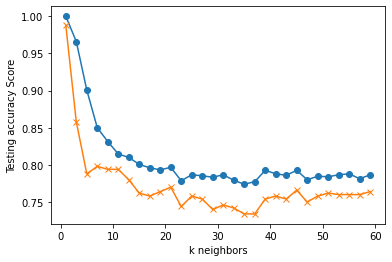

In [31]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.858


In [39]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[289,  30],
       [ 41, 140]], dtype=int64)

In [40]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       319
           1       0.82      0.77      0.80       181

    accuracy                           0.86       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.86      0.86      0.86       500



In [41]:
from sklearn.metrics import roc_curve

In [42]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

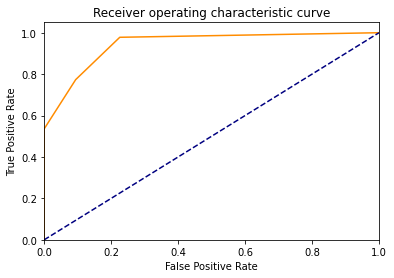

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.show()

In [19]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
roc_auc

0.8588042744072464

In [22]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       1.00      0.01      0.01       319
         red       0.36      1.00      0.53       181

    accuracy                           0.37       500
   macro avg       0.68      0.50      0.27       500
weighted avg       0.77      0.37      0.20       500



##  Remember Check Base Rate Fallacy !!!
#### Also maybe check lasso, Ridge and/or elasticnet for linear regressions to fine tune....
#### maybe oen of those t-sne plots (?)